# E-commerce dataset analysis with Pandas
We have a sales dataset by category and spendings with 5000 rows.
First of all, we prepare our dataset and pandas for work and check the table by pandas tools.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sales = pd.read_csv('datasets/ecommerce.csv')
sales.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

---
As we see our dataset has no empty cells and the quality is pretty good, so we can start the analysis without any cleaning and preparing. 
However the list of reports that I want to represent:
1. overall sales summary
2. sales by product category
3. new vs returning customers
4. customer age analysis
5. sales over time
6. peak periods
7. payment method distribution
8. device type comparison
9. delivery time analysis
10. delivery time vs customer rating
11. session duration & pages viewed
***
## Overall Sales Summary
Total revenue, number of orders, total items sold, and average order value.

In [3]:
revenue = sales.Total_Amount.sum()
n_orders = sales.Order_ID.count()
n_items_sold = sales.Quantity.sum()
avg_order_value = revenue / n_orders

# By the city names we can say that the currency is turkish lira (TRY)
print('Total revenue: ', revenue, ' TRY')
print('Number of orders in the report: ', n_orders)
print('Total items sold: ', n_items_sold)
print('Average order value: ', avg_order_value, ' TRY')

Total revenue:  4915544.57  TRY
Number of orders in the report:  5000
Total items sold:  11100
Average order value:  983.108914  TRY


---
## Sales by Product Category
Comparing total revenue and quantity sold by category.

In [4]:
categories = sales.groupby('Product_Category').Total_Amount.sum()
revenue_ratio_percentage = round(categories / revenue * 100, 2)

category_ratio = pd.DataFrame({
    'Total_Revenue': categories,
    '%': revenue_ratio_percentage
}).sort_values('%', ascending=False).reset_index()

category_ratio

,Product_Category,Total_Revenue,%
0,Electronics,2328806.81,47.38
1,Home & Garden,908348.86,18.48
2,Sports,754563.56,15.35
3,Fashion,375214.93,7.63
4,Toys,223142.48,4.54
5,Beauty,156584.74,3.19
6,Food,96138.67,1.96
7,Books,72744.52,1.48


<Axes: ylabel='%'>

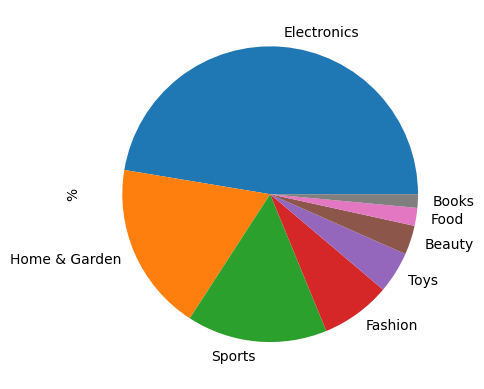

In [5]:
category_ratio['%'].plot.pie(labels=category_ratio['Product_Category'])

### Conclusion
We can see that almost half of the total revenue is **Electronics** selling.  
But **Home & Garden** and **Sports** categories are also valuable and together it's more than 30% of total income.  
**Books** and **Food** are the least valuable categorie.

---
## New vs Returning Customers
Comparing total sales, average order value, and number of orders between new and returning customers.

In [6]:
old_revenue = sales.loc[sales.Is_Returning_Customer == True].Total_Amount.sum()
old_n_orders = sales.loc[sales.Is_Returning_Customer == True].Order_ID.count()
old_n_items_sold = sales.loc[sales.Is_Returning_Customer == True].Quantity.sum()
old_avg_order_value = old_revenue / old_n_orders

new_revenue = sales.loc[sales.Is_Returning_Customer == False].Total_Amount.sum()
new_n_orders = sales.loc[sales.Is_Returning_Customer == False].Order_ID.count()
new_n_items_sold = sales.loc[sales.Is_Returning_Customer == False].Quantity.sum()
new_avg_order_value = new_revenue / new_n_orders


return_customers_compare = pd.DataFrame({
    'Revenue': [old_revenue, new_revenue, revenue],
    'Orders_Number': [old_n_orders, new_n_orders, n_orders],
    'Items_Sold': [old_n_items_sold, new_n_items_sold, n_items_sold],
    'Average_Order': [old_avg_order_value, new_avg_order_value, avg_order_value]
}, index=(['Returning customers', 'New customers', 'Total']))
return_customers_compare

,Revenue,Orders_Number,Items_Sold,Average_Order
Returning customers,2948020.84,2990,6653,985.960147
New customers,1967523.73,2010,4447,978.867527
Total,4915544.57,5000,11100,983.108914


### Conclusion
If we compare **Returning customers** and **New customers** we see that there is no big difference in *average order value*, but returning customers make more orders and they bring in more money. The difference between them is not so big, but anyway the company should focus on ways to return clients.

---
## Customer Age Analysis
Group customers by age brackets to analyze their spending behavior.

In [7]:
sales.groupby('Age').Total_Amount.sum().sort_index()
# Checking the amount of customers of each age in the dataset
# To understand what groups we should divide them by

Age
18    469510.36
19     63028.59
20     86873.07
21     65807.41
22     93039.33
23    114931.35
24    112017.44
25    139222.85
26    112556.99
27    156791.34
28    146522.91
29    162812.97
30    140948.43
31    117153.35
32    174564.21
33    111426.20
34    174982.42
35    138884.74
36    113762.35
37    201378.69
38    133703.95
39    125752.57
40    190542.37
41    144731.40
42    131188.71
43    149772.96
44    153288.33
45    136268.33
46    106171.79
47    108880.93
48     74850.95
49     60367.19
50     66567.13
51     47397.28
52     59379.51
53     38363.64
54     49558.85
55     61560.58
56     31627.83
57     34315.51
58     23149.21
59     19648.70
60     20094.16
61      6086.33
62      7667.00
63     17837.41
64      5177.07
65      2610.56
66      1259.95
67       879.44
68      4677.62
69       879.96
70       617.81
71       627.00
72      2649.96
73        87.58
75      1090.00
Name: Total_Amount, dtype: float64

In [8]:
# I will make next groups:
age_labels = [
    '18-21', '22-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '65+'
]
# 76 the last border cause the max age is 75
age_bins = [18, 22, 26, 31, 36, 41, 46, 51, 56, 61, 66, 76]

age_analysis = sales
age_analysis['Age_Group'] = pd.cut(sales['Age'], bins=age_bins, labels=age_labels, right=False)
age_analysis = pd.DataFrame({
    'Total_Amount': age_analysis.groupby('Age_Group').Total_Amount.sum()
}).reset_index()
age_analysis.sort_values('Total_Amount', ascending=False)

/var/folders/5r/k4s9_9s555s7j9np7w11x1n80000gn/T/ipykernel_52017/23821073.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Total_Amount': age_analysis.groupby('Age_Group').Total_Amount.sum()


,Age_Group,Total_Amount
4,36-40,765139.93
2,26-30,719632.64
3,31-35,717010.92
5,41-45,715249.73
0,18-21,685219.43
1,22-25,459210.97
6,46-50,416837.99
7,51-55,256259.86
8,56-60,128835.41
9,61-65,39378.37


<Axes: xlabel='Age_Group'>

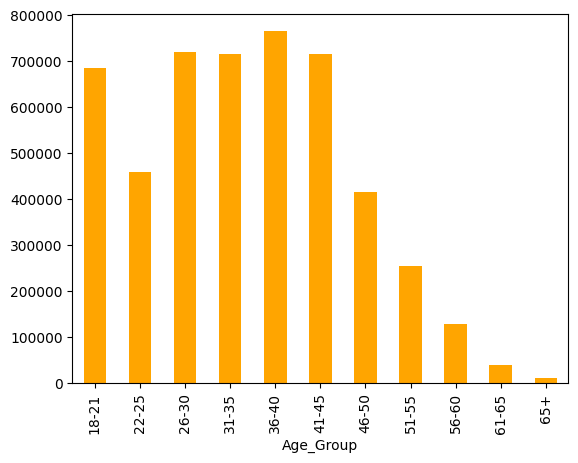

In [9]:
age_analysis.set_index('Age_Group')['Total_Amount'].plot.bar(color='orange')

### Conclusion
The most valuable group of customers have age **between 26 and 45 years**, we can clearly see this on the graph.  
The company should focus specifically on this category of buyers.

---
## Sales Over Time
Tracking total sales daily, weekly, monthly to indetify trends and seasonality.

In [10]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales_bydate = sales.groupby('Date').agg({
    'Total_Amount': 'sum',
    'Quantity': 'sum',
    'Customer_ID': 'count'
}).reset_index().rename(columns={'Customer_ID': 'Customers'})
sales_bydate

,Date,Total_Amount,Quantity,Customers
0,2023-01-01,9657.24,18,8
1,2023-01-02,14878.42,27,10
2,2023-01-03,5058.95,6,5
3,2023-01-04,32173.70,30,11
4,2023-01-05,6609.08,31,15
...,...,...,...,...
446,2024-03-22,12098.00,29,12
447,2024-03-23,7172.87,27,14
448,2024-03-24,13754.10,16,9
449,2024-03-25,12379.34,26,10


In [11]:
sales.groupby(sales['Date'].dt.to_period('W')).agg({
    'Total_Amount': 'sum',
    'Quantity': 'sum',
    'Customer_ID': 'count'
}).reset_index().rename(columns={'Customer_ID': 'Customers'})

,Date,Total_Amount,Quantity,Customers
0,2022-12-26/2023-01-01,9657.24,18,8
1,2023-01-02/2023-01-08,72357.61,136,62
2,2023-01-09/2023-01-15,47583.32,114,61
3,2023-01-16/2023-01-22,54470.13,136,66
4,2023-01-23/2023-01-29,95505.97,173,81
...,...,...,...,...
61,2024-02-26/2024-03-03,73152.46,169,79
62,2024-03-04/2024-03-10,65189.68,171,69
63,2024-03-11/2024-03-17,80485.43,172,76
64,2024-03-18/2024-03-24,77952.71,187,84


In [12]:
sales.groupby(sales['Date'].dt.to_period('M')).agg({
    'Total_Amount': 'sum',
    'Quantity': 'sum',
    'Customer_ID': 'count'
}).reset_index().rename(columns={'Customer_ID': 'Customers'})

,Date,Total_Amount,Quantity,Customers
0,2023-01,286694.32,619,301
1,2023-02,338784.92,741,334
2,2023-03,321716.01,816,344
3,2023-04,257332.58,662,281
4,2023-05,351902.03,780,355
5,2023-06,324356.96,763,349
6,2023-07,346618.03,711,342
7,2023-08,391505.89,795,371
8,2023-09,262602.86,671,306
9,2023-10,352286.61,849,361


<Axes: xlabel='Date'>

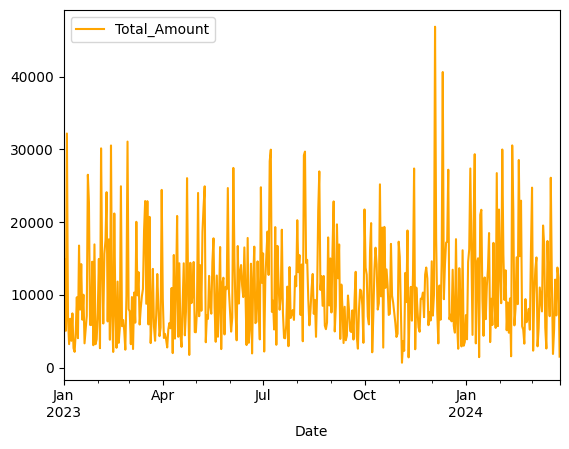

In [13]:
sales_bydate.plot(x='Date', y='Total_Amount', color='orange')

### Conclusion
We can see that revenue hasn't shown any consistent *upward or downward trend* over time.  
This is a good indicator of stability, otherwise we don't see any development as well.

---
## Peak Periods
Which months have the highest average order value.

In [14]:
peaks = sales.groupby(sales['Date'].dt.to_period('M')).agg({
    'Total_Amount': 'sum',
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'Customers'})
peaks['AVG_Order_Value'] = peaks['Total_Amount'] / peaks['Customers']
peaks.sort_values('AVG_Order_Value', ascending=False).reset_index()

,Date,Total_Amount,Customers,AVG_Order_Value
0,2024-02,342913.06,307,1116.980651
1,2024-01,396874.92,358,1108.589162
2,2023-08,391505.89,371,1055.271941
3,2023-12,384717.52,367,1048.276621
4,2023-02,338784.92,334,1014.326108
5,2023-07,346618.03,342,1013.503012
6,2023-05,351902.03,355,991.273324
7,2023-10,352286.61,361,975.863186
8,2024-03,274632.76,288,953.585972
9,2023-01,286694.32,301,952.472824


### Conclusion
The worst month has *more customers* than the best.  
The company should analyze what could have influenced the growth of the average order value at the **beginning of 2024**, since this is a couple of months after the worst period.

---
## Payment Method Distribution
Measuring which payment methods are most commonly used.

In [15]:
payment_distribution = pd.DataFrame(
    sales.groupby('Payment_Method').Order_ID.count()
).sort_values('Order_ID', ascending=False).reset_index().rename(columns={'Order_ID': 'Orders'})
payment_distribution['%'] = round(payment_distribution['Orders'] / n_orders * 100, 2)
payment_distribution

,Payment_Method,Orders,%
0,Credit Card,2012,40.24
1,Debit Card,1265,25.30
2,Digital Wallet,965,19.30
3,Bank Transfer,510,10.20
4,Cash on Delivery,248,4.96


<Axes: ylabel='%'>

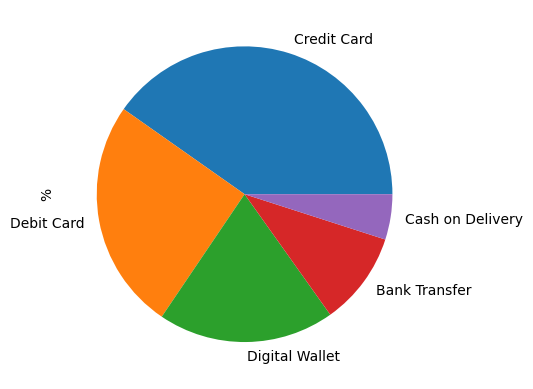

In [16]:
payment_distribution['%'].plot.pie(labels=payment_distribution['Payment_Method'])

### Conclusion
Of course 40% of total number of orders is paid by **credit card**, that situation is common in e-commerce (because of e-safety).  
But we can see that only 5% of orders are paid by **cash**, so should be a reason for this, because usually people like to pay after receiving anything, not before. Maybe there are some *restrictions* when you order something by cash.

---
## Device Type Comparison
Comparing revenue, session duration, pages viewed, orders count, average order value between device types.

In [17]:
device_comparison = sales.groupby('Device_Type').agg({
    'Session_Duration_Minutes': 'mean',
    'Pages_Viewed': 'mean',
    'Total_Amount': 'sum',
    'Order_ID': 'count'
})
device_comparison['Average_Order_Value'] = device_comparison['Total_Amount'] / device_comparison['Order_ID']
device_comparison.rename(columns={
    'Session_Duration_Minutes': 'AVG_Session',
    'Pages_Viewed': 'AVG_Pages_Viewed',
    'Order_ID': 'Orders_Number'
}).reset_index()

,Device_Type,AVG_Session,AVG_Pages_Viewed,Total_Amount,Orders_Number,Average_Order_Value
0,Desktop,14.922852,8.964933,1650103.78,1711,964.408989
1,Mobile,14.348837,9.003578,2810468.64,2795,1005.534397
2,Tablet,14.633603,8.941296,454972.15,494,920.996255


### Conclusion
Nowadays the favourite people's platform is **Mobile**.  
But in other hand we see that **Mobile** platform has the *lowest user retention*, average session duration is the *lowest* between other.  
The company should do more deep *UX/UI analysis*, it could be a reason.

---
## Delivery Time Analysis
Calculating average delivery time overall and by city or category, to detect cities or categories with slower deliviries.

In [18]:
avg_delivery = sales['Delivery_Time_Days'].mean()

city_delivery = pd.DataFrame(sales.groupby('City').Delivery_Time_Days.mean())
city_delivery['Average_Ratio'] = city_delivery['Delivery_Time_Days'] - avg_delivery
city_delivery.sort_values('Delivery_Time_Days').reset_index()

,City,Delivery_Time_Days,Average_Ratio
0,Konya,5.946372,-0.550628
1,Kayseri,6.264591,-0.232409
2,Gaziantep,6.275072,-0.221928
3,Bursa,6.395161,-0.101839
4,Antalya,6.422460,-0.074540
5,Ankara,6.549660,0.052660
6,Izmir,6.593333,0.096333
7,Adana,6.611111,0.114111
8,Eskisehir,6.628571,0.131571
9,Istanbul,6.670561,0.173561


In [19]:
category_delivery = pd.DataFrame(sales.groupby('Product_Category').Delivery_Time_Days.mean())
category_delivery['Average_Ratio'] = category_delivery['Delivery_Time_Days'] - avg_delivery
category_delivery.sort_values('Delivery_Time_Days').reset_index()

,Product_Category,Delivery_Time_Days,Average_Ratio
0,Beauty,6.367150,-0.129850
1,Electronics,6.386218,-0.110782
2,Toys,6.418033,-0.078967
3,Fashion,6.454984,-0.042016
4,Books,6.465909,-0.031091
5,Home & Garden,6.533011,0.036011
6,Food,6.625202,0.128202
7,Sports,6.709145,0.212145


### Conclusion
The difference between cities and categories is not so big, that means that the level of delivery service is **equally good** in all categories and cities, but anyway we can say at least something:  
- Cities  
  The bigger cities have slower delivery, and the worst is **Istanbul**. So the company can think about changes in logistical system.
- Categories  
  The slowest category is **Sports** which is the third biggest category *(around 15% of total revenue amount)*, the company should check what reasons can lead to this.

---
## Delivery Time vs Customer Rating
Checking if longer delivery times lead to lower customer satisfaction.

In [20]:
delivery_rating = pd.DataFrame(sales.groupby('Delivery_Time_Days').Customer_Rating.mean()).reset_index()
delivery_rating

,Delivery_Time_Days,Customer_Rating
0,1,3.632353
1,2,3.862687
2,3,4.040780
3,4,3.911628
4,5,3.887725
5,6,3.859016
6,7,3.894325
7,8,3.952020
8,9,3.856707
9,10,3.928571


<Axes: xlabel='Delivery_Time_Days'>

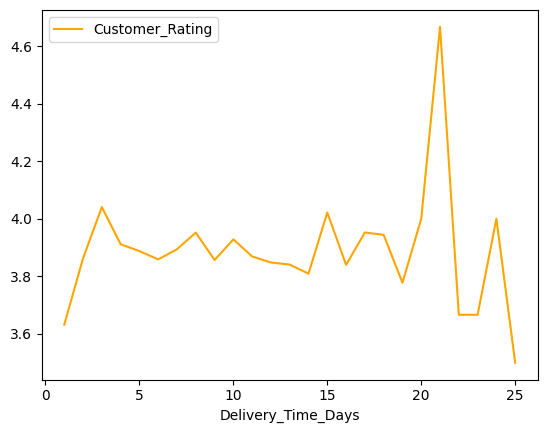

In [21]:
delivery_rating.plot(x='Delivery_Time_Days', y='Customer_Rating', color='orange')

### Conclusion
We cannot see any trend or correlations between **delivery time** and **customer rating**.

---
## Session Duration & Pages Viewed
Checking how browsing behavior relates to total spending.
Are customers who spend more time or view more pages spending more money?

In [22]:
session_duration = pd.DataFrame(sales.groupby('Session_Duration_Minutes').Total_Amount.mean())
session_duration = session_duration.rename(columns={'Total_Amount': 'AVG_Amount'}).reset_index()
session_duration

,Session_Duration_Minutes,AVG_Amount
0,1,881.305349
1,2,1142.589254
2,3,961.105984
3,4,933.453690
4,5,920.199275
5,6,1061.687551
6,7,972.326641
7,8,1037.323485
8,9,994.351488
9,10,990.386891


<Axes: xlabel='Session_Duration_Minutes'>

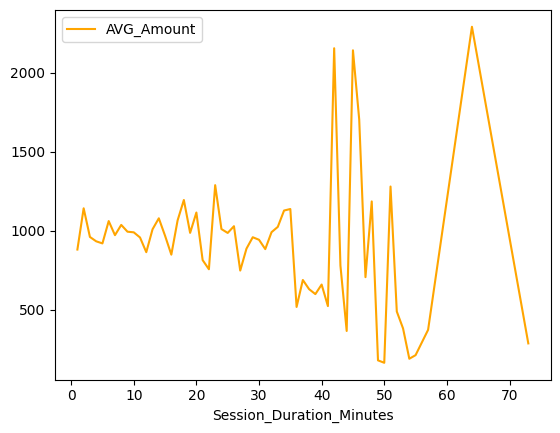

In [23]:
session_duration.plot(x='Session_Duration_Minutes', y='AVG_Amount', color='orange')

In [24]:
pages_viewed = pd.DataFrame(sales.groupby('Pages_Viewed').Total_Amount.mean())
pages_viewed = pages_viewed.rename(columns={'Total_Amount': 'AVG_Amount'}).reset_index()
pages_viewed

,Pages_Viewed,AVG_Amount
0,1,70.155000
1,2,974.569286
2,3,1122.857647
3,4,957.414507
4,5,1024.420737
5,6,959.217562
6,7,1107.817372
7,8,1088.983984
8,9,880.116705
9,10,951.960374


<Axes: xlabel='Pages_Viewed'>

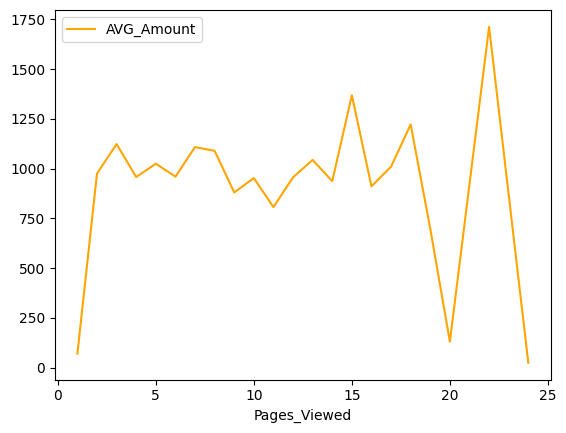

In [25]:
pages_viewed.plot(x='Pages_Viewed', y='AVG_Amount', color='orange')

### Conclusion
**Session duration** does affect the amount of money spent, but the **number of pages viewed** does not.  
If users spend a long time on specific pages, *the chances of them making an order are higher*.